Data exploration and pre-processing

Import libraries. (DELETE THIS NOTE LATER: Left various libraries used in exercises if will be needed later.)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math #For the log10 function
from sklearn.preprocessing import StandardScaler

#import seaborn as sns
#import sklearn as sk
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.dummy import DummyRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
#from sklearn.linear_model import Lasso
#from sklearn.utils import resample

Import the train and test .csv files into Pandas DataFrame.

In [6]:
data_train = pd.read_csv("data/train.csv")
x_train = data_train.drop(columns=["Id", "pSat_Pa"], axis=1)
y_train = data_train[["Id", "pSat_Pa"]]
y_train.loc[:,"target"] = y_train["pSat_Pa"].apply(lambda y: math.log10(y)) # column name must be "target"
target = y_train.loc[:,"target"]

data_test = pd.read_csv("data/test.csv")
x_test = data_test.drop(columns=["Id"], axis=1) # OR THIS ONE NOT NEEDED?
#print(data_train.columns)
#print(data_test.columns)
#print(data_train.describe())
#print(data_test.describe())
#print(x_train)
#print(y_train)
#print(x_test)
#print(target)

Notes:
- Train dataset includes 27,147 rows and 27 columns, including pSat_Pa as the last column.
- Test dataset includes 4490 rows and 26 columns, excluding pSat_Pa.

Plot each variable against the target variable.

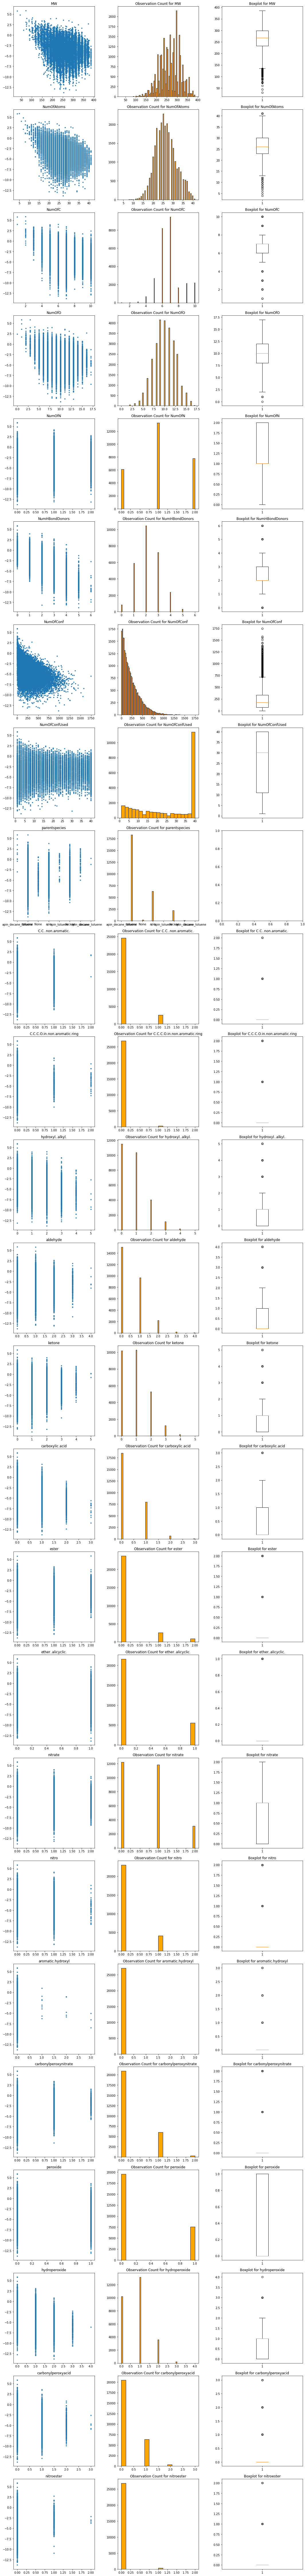

In [3]:
n = x_train.shape[1]

fig, axes = plt.subplots(n, 3, figsize=(15, 5 * n))

# Plot each column
for i in range(n):
    #Scatter plot
    axes[i,0].scatter(x_train.iloc[:, i], target, label=x_train.columns[i], marker='.')
    axes[i,0].set_title(x_train.columns[i])

    # Add a histogram for the count of observations
    axes[i,1].hist(x_train.iloc[:,i], bins="auto", color='orange', edgecolor="black")
    axes[i,1].set_title(f'Observation Count for {x_train.columns[i]}')

    #Add a boxplot for a variable
    if x_train.columns[i] != "parentspecies":
        axes[i, 2].boxplot(x_train.iloc[:, i])
        axes[i, 2].set_title(f'Boxplot for {x_train.columns[i]}')
    else:
        continue

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Scale the explainable features for better model performance. Tree-based models or Naive Bayes do not necessarily benefit from scaling, but most of the other models do.

In [25]:
standard_scaler = StandardScaler()

x_train_less_one = x_train.drop("parentspecies", axis=1)
variable_names = x_train_less_one.columns

#Fit the scaler on and transform the training data
x_train_less_one_scaled =  standard_scaler.fit_transform(x_train_less_one)
x_train_less_one_scaled =  pd.DataFrame(x_train_less_one_scaled, columns=variable_names)
#print(x_train_less_one_scaled)

#Transform the test data using the same scaler as with training data
x_test_less_one = x_test.drop("parentspecies", axis=1)
variable_names_test = x_test_less_one.columns
x_test_less_one_scaled = standard_scaler.transform(x_test_less_one)
x_test_less_one_scaled = pd.DataFrame(x_test_less_one_scaled, columns=variable_names_test)
#print(x_test_less_one_scaled)

            MW  NumOfAtoms    NumOfC    NumOfO    NumOfN  NumHBondDonors  \
0    -2.937297   -3.097406 -2.659138 -1.975681 -1.490005       -1.179283   
1     1.314660    0.337193 -0.592777  1.632217  1.318770       -1.179283   
2     0.713462    0.337193 -0.592777  0.830462  1.318770       -0.197891   
3    -0.268209    0.718815  0.784796 -0.773048 -0.085618       -0.197891   
4    -1.411899   -0.616862 -0.592777 -1.173926 -1.490005        0.783501   
...        ...         ...       ...       ...       ...             ...   
4485 -0.189542   -0.807673 -1.281564  0.429584 -0.085618       -1.179283   
4486  1.034275    0.528004 -0.592777  1.231339  1.318770        0.783501   
4487  1.274962    0.718815  0.096009  1.231339  1.318770        0.783501   
4488 -0.570015   -0.426051  0.096009 -0.372171 -1.490005       -0.197891   
4489  0.994577    0.909626  0.096009  0.830462  1.318770       -0.197891   

      NumOfConf  NumOfConfUsed  C.C..non.aromatic.  \
0     -1.107153      -1.478989   

Repeat the plots with standardized scale. Variable "parentspecies" not included in the dataset due to it being categorical.

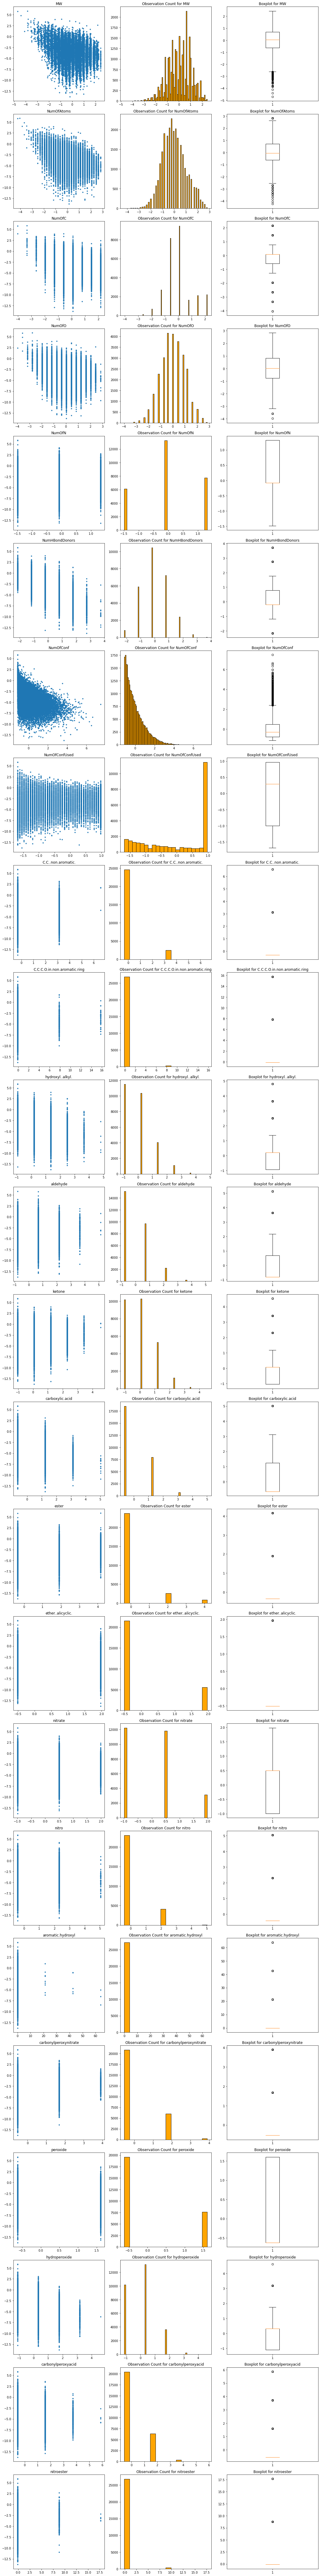

In [18]:
n = x_train_less_one_scaled.shape[1]

fig, axes = plt.subplots(n, 3, figsize=(15, 5 * n))

# Plot each column
for i in range(n):
    #Scatter plot
    axes[i,0].scatter(x_train_less_one_scaled.iloc[:, i], target, label=x_train_less_one_scaled.columns[i], marker='.')
    axes[i,0].set_title(x_train_less_one_scaled.columns[i])

    # Add a histogram for the count of observations
    axes[i,1].hist(x_train_less_one_scaled.iloc[:,i], bins="auto", color='orange', edgecolor="black")
    axes[i,1].set_title(f'Observation Count for {x_train_less_one_scaled.columns[i]}')

    #Add a boxplot for a variable
    axes[i, 2].boxplot(x_train_less_one_scaled.iloc[:, i])
    axes[i, 2].set_title(f'Boxplot for {x_train_less_one_scaled.columns[i]}')
 
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Q&A
- Should we include the "Id" column in both x_train and y_train DataFrames?
- Do we want to exclude some of the outliers? At least if we start optimizing the results, we could try that.

Key points:
- All of the training data is valid; that is, there are no missing or mismatched values for any of the variables. This observation is based on the variable-specific graphs available in Kaggle.
- The explainable variables have been scaled, except for the categorical variable "parentspecies", to improve model performance.
